In [ ]:
import os
import numpy as np
import argparse
import torch
from google.colab import drive
import sys
drive.mount('/content/drive', force_remount=True)
sys.path.insert(0,'/content/drive/My Drive/TFM/github/')

import models
from utils.Params import Params
from utils.Dataset import Dataset
from utils.Logger import Logger
from utils.Evaluator import Evaluator
from utils.Trainer import Trainer
from model_exec import model_exec
# MODELOS: 'ItemKNN', 'DAE', 'CDAE', 'BPRMF', 'MultVAE'
seed = 257
model_name = 'BPRMF'
BPRMF = model_exec(model_name)
BPRMF.initialize('ml-1m')
BPRMF.run()

model_name = 'ItemKNN'
ItemKNN = model_exec(model_name)
ItemKNN.initialize('ml-1m')
ItemKNN.run()

model_name = 'DAE'
DAE = model_exec(model_name)
DAE.initialize('ml-1m')
DAE.run()

model_name = 'CDAE'
CDAE = model_exec(model_name)
CDAE.initialize('ml-1m')
CDAE.run()

model_name = 'MultVAE'
MultVAE = model_exec(model_name)
MultVAE.initialize('ml-1m')
MultVAE.run()


Mounted at /content/drive
Already preprocessed. Load from file.
Read movielens data from /content/drive/My Drive/TFM/github/data/ml-1m/ml-1m.data
======== [Config] ========
path: /content/drive/My Drive/TFM/github/conf/itemknn.json
train_ratio: 0.8
topk: 100
shrink: 100
feature_weighting: none
num_epochs: 1
batch_size: 4096
test_batch_size: 4096
learning_rate: 0.01
early_stop: True
patience: 50
top_k: [100]
exp_conf: {'model': 'ItemKNN', 'data_dir': '/content/drive/My Drive/TFM/github/data/', 'save_dir': '/content/drive/My Drive/TFM/github/saves/', 'conf_dir': '/content/drive/My Drive/TFM/github/conf/', 'seed': 257, 'data_name': 'ml-1m', 'top_k': 100}


======== [Dataset] ========
Number of Users : 6040
Number of items : 3706
Split ratio: 0.8


======== [Config] ========
path: /content/drive/My Drive/TFM/github/conf/itemknn.json
train_ratio: 0.8
topk: 100
shrink: 100
feature_weighting: none
num_epochs: 1
batch_size: 4096
test_batch_size: 4096
learning_rate: 0.01
early_stop: True
patien

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[Epoch   1/500, epoch time: 6.51, train_time: 1.59] loss = 13513801.0000, Prec@100=0.0226 Recall@100=0.0842 NDCG@100=0.0828 Nov@100=5.4276 Gini-D=0.4503
[Epoch   1/500, epoch time: 6.51, train_time: 1.59] loss = 13513801.0000, Prec@100=0.0226 Recall@100=0.0842 NDCG@100=0.0828 Nov@100=5.4276 Gini-D=0.4503
[Epoch   2/500, epoch time: 5.72, train_time: 1.30] loss = 6618928.0000, Prec@100=0.0854 Recall@100=0.2915 NDCG@100=0.2175 Nov@100=1.9864 Gini-D=0.4074
[Epoch   2/500, epoch time: 5.72, train_time: 1.30] loss = 6618928.0000, Prec@100=0.0854 Recall@100=0.2915 NDCG@100=0.2175 Nov@100=1.9864 Gini-D=0.4074
[Epoch   3/500, epoch time: 5.68, train_time: 1.29] loss = 3804136.0000, Prec@100=0.0882 Recall@100=0.2955 NDCG@100=0.2236 Nov@100=1.9537 Gini-D=0.3547
[Epoch   3/500, epoch time: 5.68, train_time: 1.29] loss = 3804136.0000, Prec@100=0.0882 Recall@100=0.2955 NDCG@100=0.2236 Nov@100=1.9537 Gini-D=0.3547
[Epoch   4/500, epoch time: 5.71, train_time: 1.29] loss = 3323852.0000, Prec@100=0.08

Mounted at /content/drive


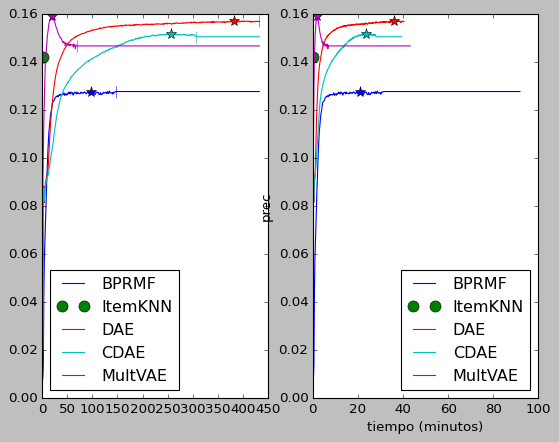

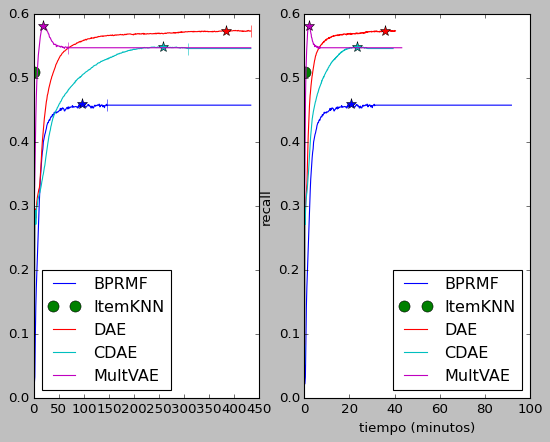

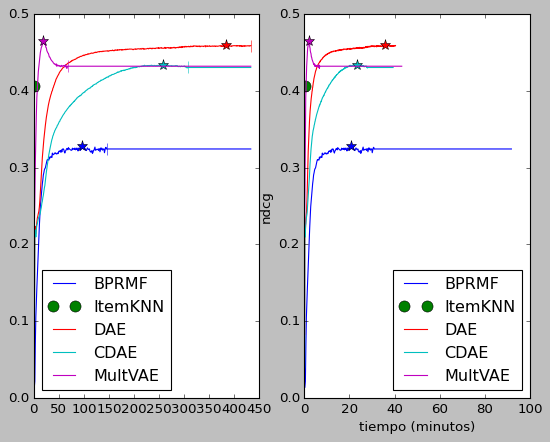

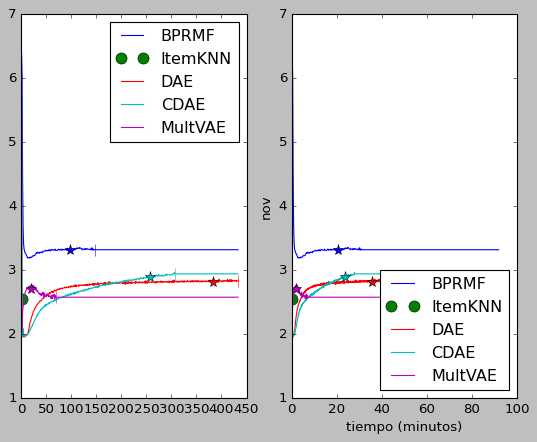

In [ ]:
import os
import numpy as np
import argparse
import torch
from google.colab import drive
import sys
drive.mount('/content/drive', force_remount=True)
sys.path.insert(0,'/content/drive/My Drive/TFM/github/')
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
columns = ['epoch','epoch_time','train_time','loss','prec','recall','ndcg','nov']
BPRMF = pd.read_csv("/content/drive/My Drive/TFM/github/saves/BPRMF06_05_2021_08_14_15.csv")
BPRMF_size = BPRMF['epoch'].size
ItemKNN = pd.read_csv("/content/drive/My Drive/TFM/github/saves/ItemKNN06_05_2021_08_31_03.csv")
ItemKNN_size = ItemKNN['epoch'].size
DAE = pd.read_csv("/content/drive/My Drive/TFM/github/saves/DAE06_05_2021_09_11_30.csv")
DAE_size = DAE['epoch'].size
CDAE = pd.read_csv("/content/drive/My Drive/TFM/github/saves/CDAE06_05_2021_09_39_36.csv")
CDAE_size = CDAE['epoch'].size
MultVAE = pd.read_csv("/content/drive/My Drive/TFM/github/saves/MultVAE06_05_2021_09_46_35.csv")
MultVAE_size = MultVAE['epoch'].size

max_size = np.amax([BPRMF_size,DAE_size,CDAE_size,MultVAE_size])
BPRMF['time'] = BPRMF['epoch_time'].cumsum()/60
BPRMF_e = BPRMF.copy()
BPRMF_e=BPRMF_e.append([BPRMF.iloc[-1]]*(max_size-BPRMF_size),ignore_index=True)
BPRMF_e.drop('epoch',axis=1,inplace=True)
BPRMF_e['epoch'] = np.arange(1, max_size+1)
BPRMF_e['time'] = BPRMF_e['epoch_time'].cumsum()/60
ItemKNN['time'] = ItemKNN['epoch_time'].cumsum()/60
ItemKNN_e = ItemKNN.copy()
ItemKNN_e=ItemKNN_e.append([ItemKNN.iloc[-1]]*(max_size-ItemKNN_size),ignore_index=True)
ItemKNN_e.drop('epoch',axis=1,inplace=True)
ItemKNN_e['epoch'] = np.arange(1, max_size+1)
ItemKNN_e['time'] = ItemKNN_e['epoch_time'].cumsum()/60
DAE['time'] = DAE['epoch_time'].cumsum()/60
DAE_e = DAE.copy()
DAE_e=DAE_e.append([DAE.iloc[-1]]*(max_size-DAE_size),ignore_index=True)
DAE_e.drop('epoch',axis=1,inplace=True)
DAE_e['epoch'] = np.arange(1, max_size+1)
DAE_e['time'] = DAE_e['epoch_time'].cumsum()/60
CDAE['time'] = CDAE['epoch_time'].cumsum()/60
CDAE_e = CDAE.copy()
CDAE_e=CDAE_e.append([CDAE.iloc[-1]]*(max_size-CDAE_size),ignore_index=True)
CDAE_e.drop('epoch',axis=1,inplace=True)
CDAE_e['epoch'] = np.arange(1, max_size+1)
CDAE_e['time'] = CDAE_e['epoch_time'].cumsum()/60
MultVAE['time'] = MultVAE['epoch_time'].cumsum()/60
MultVAE_e = MultVAE.copy()
MultVAE_e=MultVAE_e.append([MultVAE.iloc[-1]]*(max_size-MultVAE_size),ignore_index=True)
MultVAE_e.drop('epoch',axis=1,inplace=True)
MultVAE_e['epoch'] = np.arange(1, max_size+1)
MultVAE_e['time'] = MultVAE_e['epoch_time'].cumsum()/60

estadisticos = ['prec','recall','ndcg','nov']
for est in estadisticos:
  fig, (ax,bx = plt.subplots(1,2)
  #ax.set_yscale('log', basey=2)
  ax.plot(BPRMF_e['epoch'], BPRMF_e[est], '-b', label='BPRMF')
  ax.plot(BPRMF.iloc[-1]['epoch'], BPRMF.iloc[-1][est], 'b|',linewidth=10,markersize=10)
  ax.plot(BPRMF.iloc[BPRMF['ndcg'].idxmax()]['epoch'], BPRMF.iloc[BPRMF['ndcg'].idxmax()][est], 'b*',linewidth=10,markersize=10)
  ax.plot(ItemKNN.iloc[ItemKNN['ndcg'].idxmax()]['epoch'], ItemKNN.iloc[ItemKNN['ndcg'].idxmax()][est], 'go',linewidth=20,markersize=10,label='ItemKNN')
  ax.plot(DAE_e['epoch'], DAE_e[est], '-r', label='DAE')
  ax.plot(DAE.iloc[-1]['epoch'], DAE.iloc[-1][est], 'r|',linewidth=10,markersize=10)
  ax.plot(DAE.iloc[DAE['ndcg'].idxmax()]['epoch'], DAE.iloc[DAE['ndcg'].idxmax()][est], 'r*',linewidth=10,markersize=10)
  ax.plot(CDAE_e['epoch'], CDAE_e[est], '-c', label='CDAE')
  ax.plot(CDAE.iloc[-1]['epoch'], CDAE.iloc[-1][est], 'c|',linewidth=10,markersize=10)
  ax.plot(CDAE.iloc[CDAE['ndcg'].idxmax()]['epoch'], CDAE.iloc[CDAE['ndcg'].idxmax()][est], 'c*',linewidth=10,markersize=10)
  ax.plot(MultVAE_e['epoch'], MultVAE_e[est], '-m', label='MultVAE')
  ax.plot(MultVAE.iloc[-1]['epoch'], MultVAE.iloc[-1][est], 'm|',linewidth=10,markersize=10)
  ax.plot(MultVAE.iloc[MultVAE['ndcg'].idxmax()]['epoch'], MultVAE.iloc[MultVAE['ndcg'].idxmax()][est], 'm*',linewidth=10,markersize=10)
  ax.legend(loc='best')
  plt.xlabel('época')
  plt.ylabel(est)
  plt.show()

  fig, bx = plt.subplots()
  #ax.set_yscale('log', basey=2)
  bx.plot(BPRMF_e['time'], BPRMF_e[est], '-b', label='BPRMF')
  bx.plot(BPRMF.iloc[BPRMF['ndcg'].idxmax()]['time'], BPRMF.iloc[BPRMF['ndcg'].idxmax()][est], 'b*',linewidth=10,markersize=10)
  bx.plot(ItemKNN.iloc[ItemKNN['ndcg'].idxmax()]['time'], ItemKNN.iloc[ItemKNN['ndcg'].idxmax()][est], 'go',linewidth=20,markersize=10, label='ItemKNN')
  bx.plot(DAE_e['time'], DAE_e[est], '-r', label='DAE')
  bx.plot(DAE.iloc[DAE['ndcg'].idxmax()]['time'], DAE.iloc[DAE['ndcg'].idxmax()][est], 'r*',linewidth=10,markersize=10)
  bx.plot(CDAE_e['time'], CDAE_e[est], '-c', label='CDAE')
  bx.plot(CDAE.iloc[CDAE['ndcg'].idxmax()]['time'], CDAE.iloc[CDAE['ndcg'].idxmax()][est], 'c*',linewidth=10,markersize=10)
  bx.plot(MultVAE_e['time'], MultVAE_e[est], '-m', label='MultVAE')
  bx.plot(MultVAE.iloc[MultVAE['ndcg'].idxmax()]['time'], MultVAE.iloc[MultVAE['ndcg'].idxmax()][est], 'm*',linewidth=10,markersize=10)
  bx.legend(loc='lower right')
  plt.xlabel('tiempo (minutos)')
  plt.ylabel(est)
  plt.show()

In [ ]:
import os
import numpy as np
import argparse
import torch
from google.colab import drive
import sys
drive.mount('/content/drive', force_remount=True)
sys.path.insert(0,'/content/drive/My Drive/TFM/github/')

import models
from utils.Params import Params
from utils.Dataset import Dataset
from utils.Logger import Logger
from utils.Evaluator import Evaluator
from utils.Trainer import Trainer
from model_exec import model_exec
seed = 257
model_name = 'BPRMF'
BPRMF = model_exec(model_name)
BPRMF.initialize('books')
BPRMF.run()

model_name = 'ItemKNN'
ItemKNN = model_exec(model_name)
ItemKNN.initialize('books')
ItemKNN.run()

model_name = 'DAE'
DAE = model_exec(model_name)
DAE.initialize('books')
DAE.run()

model_name = 'CDAE'
CDAE = model_exec(model_name)
CDAE.initialize('books')
CDAE.run()

model_name = 'MultVAE'
MultVAE = model_exec(model_name)
MultVAE.initialize('books')
MultVAE.run()


Mounted at /content/drive
Preprocess starts.
Loading the dataset from "/content/drive/My Drive/TFM/github/data/books/u.data"
initial user, item: 6856 7972
Assign new user id...
Assign new item id...
Split data into train/test.
# zero train, test: 0, 0
Preprocess finished.
Read movielens data from /content/drive/My Drive/TFM/github/data/books/books.data
======== [Config] ========
path: /content/drive/My Drive/TFM/github/conf/bprmf.json
train_ratio: 0.8
hidden_dim: 64
num_epochs: 300
batch_size: 4096
test_batch_size: 4096
learning_rate: 0.01
early_stop: True
patience: 50
top_k: [100]
exp_conf: {'model': 'BPRMF', 'data_dir': '/content/drive/My Drive/TFM/github/data/', 'save_dir': '/content/drive/My Drive/TFM/github/saves/', 'conf_dir': '/content/drive/My Drive/TFM/github/conf/', 'seed': 257, 'data_name': 'books', 'top_k': 100}


======== [Dataset] ========
Number of Users : 6856
Number of items : 7972
Split ratio: 0.8


======== [Config] ========
path: /content/drive/My Drive/TFM/github/c

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[Epoch   1/300, epoch time: 9.58, train_time: 5.75] loss = 1779225.2500, Prec@100=0.0018 Recall@100=0.0115 NDCG@100=0.0060 Nov@100=7.6159 Gini-D=0.7029
[Epoch   2/300, epoch time: 8.88, train_time: 5.50] loss = 1420963.5000, Prec@100=0.0017 Recall@100=0.0111 NDCG@100=0.0057 Nov@100=7.6741 Gini-D=0.6943
[Epoch   3/300, epoch time: 8.82, train_time: 5.44] loss = 1142149.7500, Prec@100=0.0018 Recall@100=0.0113 NDCG@100=0.0058 Nov@100=7.6894 Gini-D=0.6864
[Epoch   4/300, epoch time: 8.89, train_time: 5.51] loss = 923487.5625, Prec@100=0.0019 Recall@100=0.0122 NDCG@100=0.0064 Nov@100=7.6668 Gini-D=0.6806
[Epoch   5/300, epoch time: 8.77, train_time: 5.41] loss = 739742.6875, Prec@100=0.0023 Recall@100=0.0147 NDCG@100=0.0078 Nov@100=7.5972 Gini-D=0.6775
[Epoch   6/300, epoch time: 8.80, train_time: 5.38] loss = 582913.1250, Prec@100=0.0031 Recall@100=0.0190 NDCG@100=0.0105 Nov@100=7.4727 Gini-D=0.6739
[Epoch   7/300, epoch time: 8.84, train_time: 5.44] loss = 458296.9688, Prec@100=0.0046 Rec

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[Epoch   1/500, epoch time: 7.79, train_time: 3.11] loss = 31429980.0000, Prec@100=0.0020 Recall@100=0.0126 NDCG@100=0.0072 Nov@100=7.5390 Gini-D=0.3845
[Epoch   1/500, epoch time: 7.79, train_time: 3.11] loss = 31429980.0000, Prec@100=0.0020 Recall@100=0.0126 NDCG@100=0.0072 Nov@100=7.5390 Gini-D=0.3845
[Epoch   1/500, epoch time: 7.79, train_time: 3.11] loss = 31429980.0000, Prec@100=0.0020 Recall@100=0.0126 NDCG@100=0.0072 Nov@100=7.5390 Gini-D=0.3845
[Epoch   2/500, epoch time: 7.81, train_time: 3.03] loss = 9205506.0000, Prec@100=0.0023 Recall@100=0.0146 NDCG@100=0.0079 Nov@100=7.4634 Gini-D=0.4426
[Epoch   2/500, epoch time: 7.81, train_time: 3.03] loss = 9205506.0000, Prec@100=0.0023 Recall@100=0.0146 NDCG@100=0.0079 Nov@100=7.4634 Gini-D=0.4426
[Epoch   2/500, epoch time: 7.81, train_time: 3.03] loss = 9205506.0000, Prec@100=0.0023 Recall@100=0.0146 NDCG@100=0.0079 Nov@100=7.4634 Gini-D=0.4426
[Epoch   3/500, epoch time: 7.78, train_time: 3.05] loss = 2813895.5000, Prec@100=0.0

In [ ]:
import os
import numpy as np
import argparse
import torch
from google.colab import drive
import sys
drive.mount('/content/drive', force_remount=True)
sys.path.insert(0,'/content/drive/My Drive/TFM/github/')

import models
from utils.Params import Params
from utils.Dataset import Dataset
from utils.Logger import Logger
from utils.Evaluator import Evaluator
from utils.Trainer import Trainer
from model_exec import model_exec
seed = 257
model_name = 'BPRMF'
BPRMF = model_exec(model_name)
BPRMF.initialize('lastfm')
BPRMF.run()

model_name = 'ItemKNN'
ItemKNN = model_exec(model_name)
ItemKNN.initialize('lastfm')
ItemKNN.run()

model_name = 'DAE'
DAE = model_exec(model_name)
DAE.initialize('lastfm')
DAE.run()

model_name = 'CDAE'
CDAE = model_exec(model_name)
CDAE.initialize('lastfm')
CDAE.run()

model_name = 'MultVAE'
MultVAE = model_exec(model_name)
MultVAE.initialize('lastfm')
MultVAE.run()


Mounted at /content/drive
Preprocess starts.
Loading the dataset from "/content/drive/My Drive/TFM/github/data/lastfm/u.data"
initial user, item: 7989 6242
Assign new user id...
Assign new item id...
Split data into train/test.
# zero train, test: 0, 0
Preprocess finished.
Read movielens data from /content/drive/My Drive/TFM/github/data/lastfm/lastfm.data
======== [Config] ========
path: /content/drive/My Drive/TFM/github/conf/bprmf.json
train_ratio: 0.8
hidden_dim: 64
num_epochs: 300
batch_size: 4096
test_batch_size: 4096
learning_rate: 0.01
early_stop: True
patience: 50
top_k: [100]
exp_conf: {'model': 'BPRMF', 'data_dir': '/content/drive/My Drive/TFM/github/data/', 'save_dir': '/content/drive/My Drive/TFM/github/saves/', 'conf_dir': '/content/drive/My Drive/TFM/github/conf/', 'seed': 257, 'data_name': 'lastfm', 'top_k': 100}


======== [Dataset] ========
Number of Users : 7989
Number of items : 6242
Split ratio: 0.8


======== [Config] ========
path: /content/drive/My Drive/TFM/gith

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[Epoch   1/300, epoch time: 9.36, train_time: 5.60] loss = 1666982.7500, Prec@100=0.0017 Recall@100=0.0133 NDCG@100=0.0065 Nov@100=8.0838 Gini-D=0.7213
[Epoch   2/300, epoch time: 8.86, train_time: 5.56] loss = 1344947.0000, Prec@100=0.0015 Recall@100=0.0122 NDCG@100=0.0059 Nov@100=8.1487 Gini-D=0.7093
[Epoch   3/300, epoch time: 8.65, train_time: 5.48] loss = 1089076.2500, Prec@100=0.0015 Recall@100=0.0122 NDCG@100=0.0058 Nov@100=8.1552 Gini-D=0.6974
[Epoch   4/300, epoch time: 8.67, train_time: 5.50] loss = 881981.0000, Prec@100=0.0017 Recall@100=0.0138 NDCG@100=0.0067 Nov@100=8.0808 Gini-D=0.6872
[Epoch   5/300, epoch time: 8.62, train_time: 5.45] loss = 687155.2500, Prec@100=0.0024 Recall@100=0.0193 NDCG@100=0.0094 Nov@100=7.8637 Gini-D=0.6727
[Epoch   6/300, epoch time: 8.60, train_time: 5.38] loss = 511572.7500, Prec@100=0.0044 Recall@100=0.0348 NDCG@100=0.0173 Nov@100=7.4328 Gini-D=0.6287
[Epoch   7/300, epoch time: 8.78, train_time: 5.59] loss = 373383.4688, Prec@100=0.0076 Rec

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[Epoch   1/500, epoch time: 8.69, train_time: 3.45] loss = 27544032.0000, Prec@100=0.0015 Recall@100=0.0123 NDCG@100=0.0061 Nov@100=8.1215 Gini-D=0.6459
[Epoch   1/500, epoch time: 8.69, train_time: 3.45] loss = 27544032.0000, Prec@100=0.0015 Recall@100=0.0123 NDCG@100=0.0061 Nov@100=8.1215 Gini-D=0.6459
[Epoch   1/500, epoch time: 8.69, train_time: 3.45] loss = 27544032.0000, Prec@100=0.0015 Recall@100=0.0123 NDCG@100=0.0061 Nov@100=8.1215 Gini-D=0.6459
[Epoch   2/500, epoch time: 8.56, train_time: 3.30] loss = 6391417.0000, Prec@100=0.0173 Recall@100=0.1372 NDCG@100=0.1032 Nov@100=6.0255 Gini-D=0.7138
[Epoch   2/500, epoch time: 8.56, train_time: 3.30] loss = 6391417.0000, Prec@100=0.0173 Recall@100=0.1372 NDCG@100=0.1032 Nov@100=6.0255 Gini-D=0.7138
[Epoch   2/500, epoch time: 8.56, train_time: 3.30] loss = 6391417.0000, Prec@100=0.0173 Recall@100=0.1372 NDCG@100=0.1032 Nov@100=6.0255 Gini-D=0.7138
[Epoch   3/500, epoch time: 8.63, train_time: 3.23] loss = 2140409.5000, Prec@100=0.0